# Credit Card Approval Prediction
Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. 

## Project Overview

This project aims to develop a machine learning model that predicts whether an applicant should be approved for a credit card based on various social and financial factors. The goal is to use different classification algorithms to optimize accuracy and provide insights into key approval criteria.
## Description
The dataset is taken from Kaggle and contains information about credit card applicants, including their martial status,financial status, and employment details.The dataset contains- 25128 rows × 21 columns.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Users\DEEPESH VERMA\Desktop\Puthon_pregrad\Application_Data.csv\Application_Data.csv")
df



,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25123,5150482,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,18,1
25124,5150483,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,18,1
25125,5150484,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,13,1
25126,5150485,F,1,1,1,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Core staff ...,3,30,5,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

In [6]:
df.isna().sum()

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64

In [7]:
df.Total_Income.value_counts()

Total_Income
135000    3012
180000    2312
157500    2203
225000    2166
112500    1942
          ... 
661500       1
215100       1
124200       1
234135       1
143100       1
Name: count, Length: 195, dtype: int64

In [8]:
df.Income_Type.value_counts()

Income_Type
Working                                               15616
Commercial associate                                   7052
State servant                                          2437
Pensioner                                                13
Student                                                  10
Name: count, dtype: int64

In [9]:
df.Family_Status.value_counts()

Family_Status
Married                                               17507
Single / not married                                   3444
Civil marriage                                         2133
Separated                                              1464
Widow                                                   580
Name: count, dtype: int64

In [10]:
df.Applicant_Age.value_counts()

Applicant_Age
38    1013
41     957
39     922
29     898
28     898
35     892
33     888
40     873
34     853
42     849
43     831
31     823
30     822
44     815
37     806
36     805
45     798
32     795
47     732
49     711
48     698
52     675
51     675
46     628
50     627
55     523
53     514
54     514
27     411
26     365
25     334
56     307
57     303
58     275
60     250
61     210
59     190
24     179
23     126
63      92
62      74
65      72
64      65
67      18
22      10
66       9
68       2
21       1
Name: count, dtype: int64

In [11]:
df.Job_Title.value_counts()

Job_Title
Laborers                                              6211
Core staff                                            3591
Sales staff                                           3485
Managers                                              3012
Drivers                                               2135
High skill tech staff                                 1383
Accountants                                           1241
Medicine staff                                        1207
Cooking staff                                          655
Security staff                                         592
Cleaning staff                                         549
Private service staff                                  344
Low-skill Laborers                                     175
Waiters/barmen staff                                   173
Secretaries                                            151
HR staff                                                85
Realty agents                                 

# Data Visualization
Visualizing data in four major types of visualization.

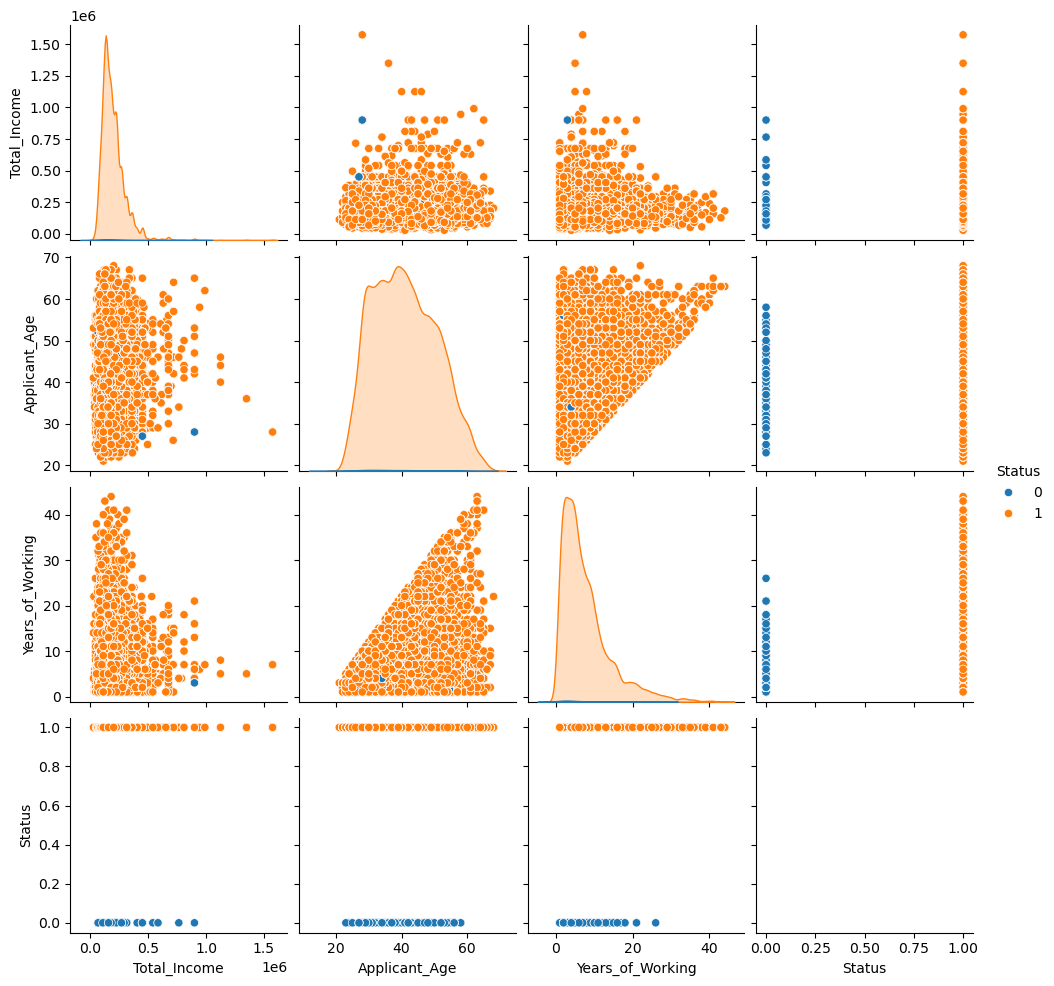

In [12]:
columns = ["Total_Income", "Applicant_Age", "Years_of_Working", "Status"]
sns.pairplot(df, vars=columns, hue="Status")  
plt.show()

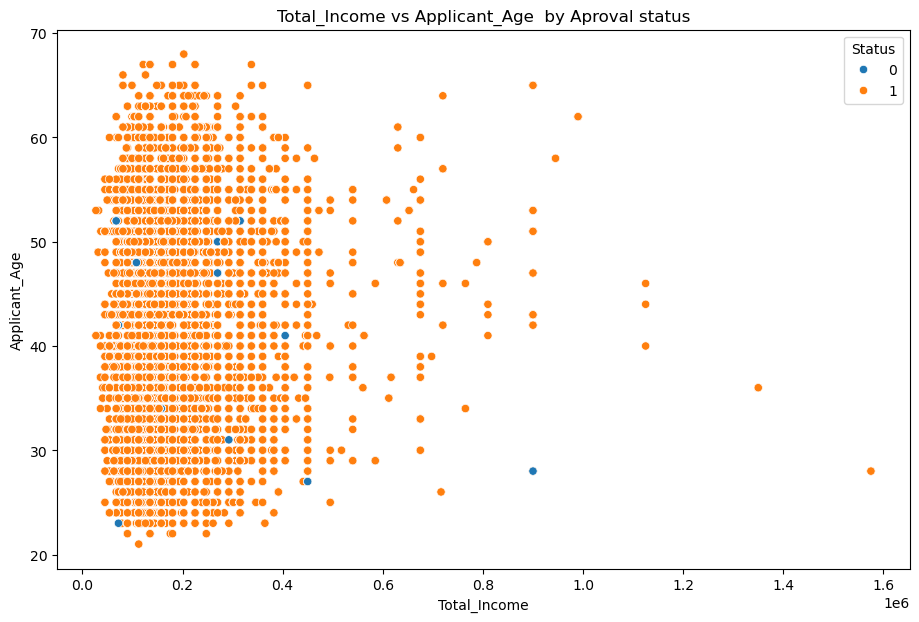

In [13]:
plt.figure(figsize=(11, 7))
sns.scatterplot(x='Total_Income', y='Applicant_Age', hue='Status', data=df)
plt.title("Total_Income vs Applicant_Age  by Aproval status")
plt.show()

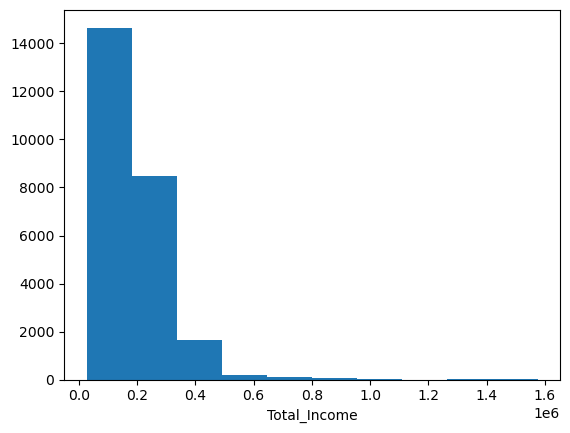

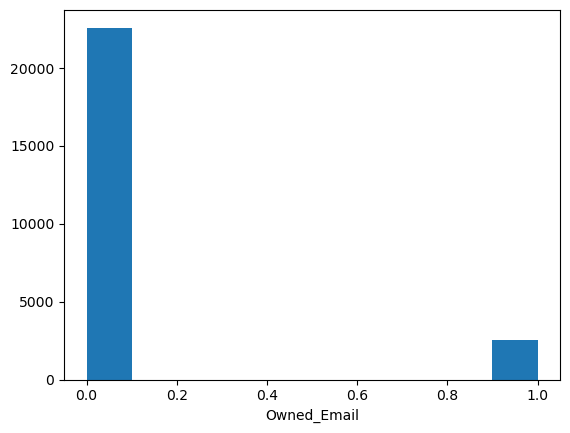

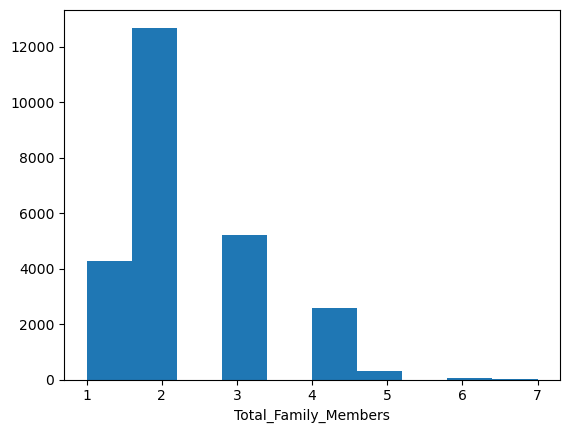

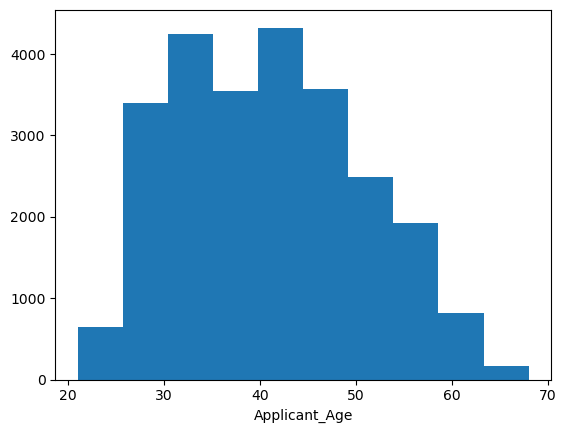

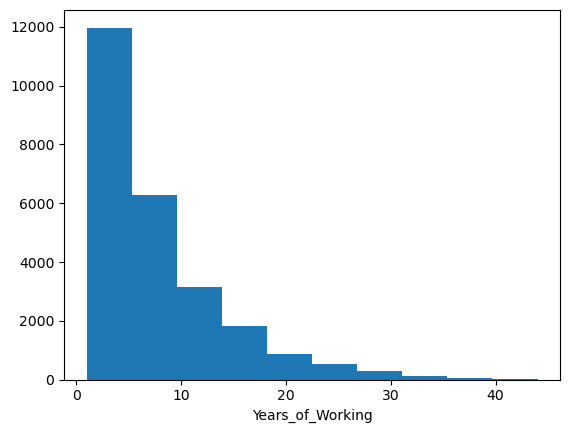

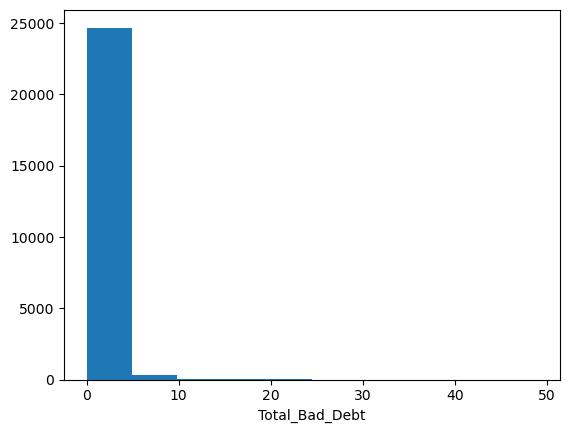

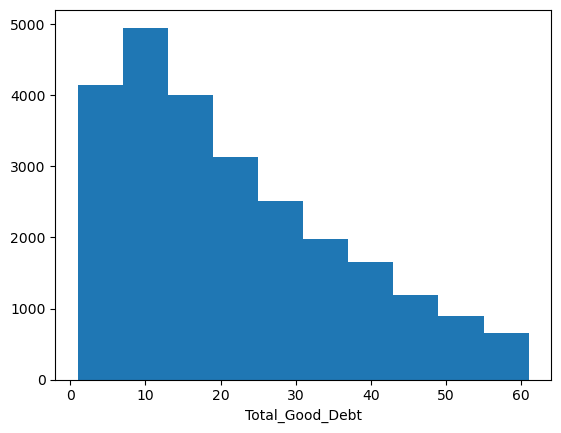

In [56]:
columns=['Total_Income','Owned_Email','Total_Family_Members','Applicant_Age','Years_of_Working','Total_Bad_Debt','Total_Good_Debt']
for column in columns:
    plt.xlabel(column)
    plt.hist(df[column])
    plt.show()

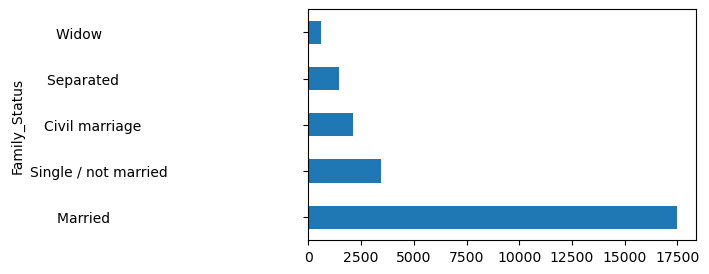

In [66]:
plt.figure(figsize=(5, 3))
df.Family_Status.value_counts().plot(kind='barh')
plt.show()
 

## Label Encoding

In [70]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
lists=['Applicant_Gender','Income_Type', 'Education_Type','Family_Status','Housing_Type','Job_Title']
for k in lists:
    d = LabelEncoder()
    df[k] = d.fit_transform(df[k].astype(str))
    label_encoders[k] = d
df    
    

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,1,1,1,0,112500,4,4,1,1,1,0,0,0,16,2,59,4,0,30,1
1,5008808,0,0,1,0,270000,0,4,3,1,1,0,1,1,14,1,53,9,0,5,1
2,5008809,0,0,1,0,270000,0,4,3,1,1,0,1,1,14,1,53,9,0,5,1
3,5008810,0,0,1,0,270000,0,4,3,1,1,0,1,1,14,1,53,9,0,27,1
4,5008811,0,0,1,0,270000,0,4,3,1,1,0,1,1,14,1,53,9,0,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25123,5150482,0,1,1,1,157500,4,4,1,1,1,0,0,0,3,3,30,5,0,18,1
25124,5150483,0,1,1,1,157500,4,4,1,1,1,0,0,0,3,3,30,5,0,18,1
25125,5150484,0,1,1,1,157500,4,4,1,1,1,0,0,0,3,3,30,5,0,13,1
25126,5150485,0,1,1,1,157500,4,4,1,1,1,0,0,0,3,3,30,5,0,2,1


## Splitting the data

In [76]:
from sklearn.model_selection import train_test_split
X = df[['Applicant_ID','Applicant_Gender', 'Owned_Car', 'Owned_Realty', 'Total_Children', 'Total_Income','Income_Type','Education_Type','Family_Status','Housing_Type','Owned_Mobile_Phone','Owned_Work_Phone','Owned_Phone','Owned_Email','Job_Title','Total_Family_Members','Applicant_Age','Years_of_Working','Total_Bad_Debt','Total_Good_Debt']]
y = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19, random_state=42)

## Standardizing the Dataset

In [80]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
from sklearn import preprocessing
from sklearn import utils


lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)

## Training The Model

### LogisticRegression

In [84]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 99.69%


### RandomForest

In [86]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 99.77%


### XGB

In [92]:
!pip install xgboost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 1.6/124.9 MB 7.6 MB/s eta 0:00:17
   - -------------------------------------- 3.9/124.9 MB 10.2 MB/s eta 0:00:12
   -- ------------------------------------- 7.3/124.9 MB 12.2 MB/s eta 0:00:10
   --- ------------------------------------ 11.5/124.9 MB 14.4 MB/s eta 0:00:08
   ---- ----------------------------------- 15.5/124.9 MB 15.5 MB/s eta 0:00:08
   ----- ---------------------------------- 18.6/124.9 MB 15.7 MB/s eta 0:00:07
   ------ --------------------------------- 21.5/124.9 MB 15.3 MB/s eta 0:00:07
   -------- ------------------------------- 25.2/124.9 MB 15.6 MB/s eta 0:00:07
   --------- ------------------------------ 28.8/124.9 MB 15.9 MB/s eta 0:00:07
   ---------- ----------------------------- 32.0/124.9 MB 15.7 MB/s eta 0:00:06
   ----------- ---------------------------- 35.7/124.9 MB 15.9


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Model Accuracy: 99.92%


### DecisionTree

In [94]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 99.96%


## Conclusion
### Accuracy of models are:
- DecisionTree-99.96%
- XGB-99.92%
- RandomForest-99.77%
- LogisticRegression-99.69%